In [3]:
pip install split-folders

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install fastai

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 233 kB 59.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 61.7 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 65.7 MB/s eta 0:00:01
     |████████████████████████████████| 490 kB 68.9 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 50.9 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 48.2 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 56.8 MB/s eta 0:00:01
     |████████████████████████████████| 914 kB 67.1 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 67.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 54.2 MB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-ext

In [5]:
import splitfolders
splitfolders.ratio(input='天津美食', output='image_1', seed=1337, ratio=(0.6, 0.2, 0.2))

Copying files: 1442 files [00:00, 2046.65 files/s]


In [6]:
from fastai.vision.all import *

In [7]:
path = Path('image_1')

In [8]:
item_tfms = Resize(224)

In [9]:
batch_tfms = aug_transforms()

In [10]:
dls = ImageDataLoaders.from_folder(
    path,
    train = 'train',
    valid = 'val',
    seed = 42,
    item_tfms = item_tfms,
    batch_tfms = batch_tfms)

/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30382 (\N{CJK UNIFIED IDEOGRAPH-76AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31958 (\N{CJK UNIFIED IDEOGRAPH-7CD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35910 (\N{CJK UNIFIED IDEOGRAPH-8C46}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26681 (\N{CJK UNIFIED IDEOGRAPH-6839}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22902 (\N{CJK UNIFIED IDEOGRAPH-5976}) missing from c

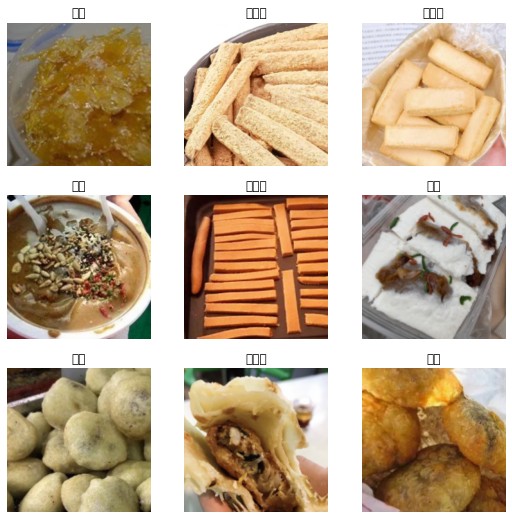

In [11]:
dls.show_batch()

In [12]:
arch = resnet18

In [13]:
learn = vision_learner(dls, arch, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/featurize/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [14]:
from fastai.callback.tracker import EarlyStoppingCallback

In [15]:
early_stop_cb = EarlyStoppingCallback

In [16]:
from fastai.callback.tracker import EarlyStoppingCallback,SaveModelCallback

In [17]:
save_model_cb =SaveModelCallback()

In [18]:
learn.fine_tune(20, 3e-3,cbs=early_stop_cb) 

epoch,train_loss,valid_loss,accuracy,time
0,4.490236,1.985023,0.489583,00:07


epoch,train_loss,valid_loss,accuracy,time
0,2.196561,1.528287,0.621528,00:07
1,1.908941,1.199751,0.673611,00:07
2,1.593431,0.971593,0.718750,00:07
3,1.296553,0.819061,0.774306,00:07
4,1.053116,0.839272,0.777778,00:07


No improvement since epoch 3: early stopping


In [19]:
learn.fine_tune(20, 3e-3,cbs=[early_stop_cb,save_model_cb])

epoch,train_loss,valid_loss,accuracy,time
0,0.343837,0.757663,0.809028,00:06


Better model found at epoch 0 with valid_loss value: 0.757663369178772.


epoch,train_loss,valid_loss,accuracy,time
0,0.259415,0.779469,0.791667,00:06
1,0.239578,0.759905,0.798611,00:06
2,0.208378,0.733556,0.809028,00:07
3,0.195843,0.732536,0.805556,00:07
4,0.175908,0.731189,0.809028,00:06
5,0.149864,0.708280,0.802083,00:07
6,0.142521,0.742850,0.798611,00:06


Better model found at epoch 0 with valid_loss value: 0.7794691920280457.
Better model found at epoch 1 with valid_loss value: 0.7599053978919983.
Better model found at epoch 2 with valid_loss value: 0.7335555553436279.
Better model found at epoch 3 with valid_loss value: 0.7325360774993896.
Better model found at epoch 4 with valid_loss value: 0.7311890721321106.
Better model found at epoch 5 with valid_loss value: 0.7082804441452026.
No improvement since epoch 5: early stopping


/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20161 (\N{CJK UNIFIED IDEOGRAPH-4EC1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29645 (\N{CJK UNIFIED IDEOGRAPH-73CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33104 (\N{CJK UNIFIED IDEOGRAPH-8150}) missing from c

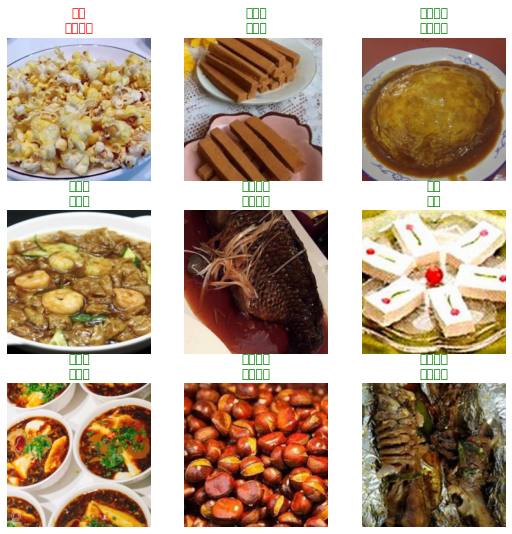

In [20]:
learn.show_results()

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 20315 (\N{CJK UNIFIED IDEOGRAPH-4F5B}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 31957 (\N{CJK UNIFIED IDEOGRAPH-7CD5}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 30524 (\N{CJK UNIFIED IDEOGRAPH-773C}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarn

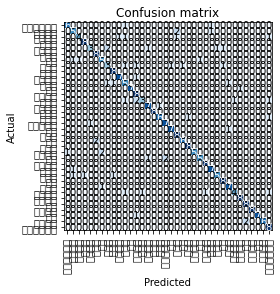

In [22]:
interp.plot_confusion_matrix()

In [23]:
interp.print_classification_report()

              precision    recall  f1-score   support

      佛手糕千眼鱼       0.86      0.75      0.80         8
        八珍羊腿       0.62      0.62      0.62         8
        八珍豆腐       0.80      0.50      0.62         8
         嘎巴菜       0.89      1.00      0.94         8
        大饼鸡蛋       0.75      0.38      0.50         8
         奶皮酥       0.80      1.00      0.89         8
          果仁       0.62      0.62      0.62         8
         果篦儿       0.50      0.38      0.43         8
         水爆肚       0.80      1.00      0.89         8
        炒青虾仁       0.88      0.88      0.88         8
         炸卷圈       0.50      0.62      0.56         8
          炸糕       1.00      0.88      0.93         8
        煎烹大虾       0.62      1.00      0.76         8
         煎焖子       0.75      0.38      0.50         8
        煎饼馃子       0.78      0.88      0.82         8
         熟梨糕       1.00      1.00      1.00         8
         牛肉饼       0.86      0.75      0.80         8
       狗不理包子       0.78    

/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28856 (\N{CJK UNIFIED IDEOGRAPH-70B8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21367 (\N{CJK UNIFIED IDEOGRAPH-5377}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22280 (\N{CJK UNIFIED IDEOGRAPH-5708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31718 (\N{CJK UNIFIED IDEOGRAPH-7BE6}) missing from c

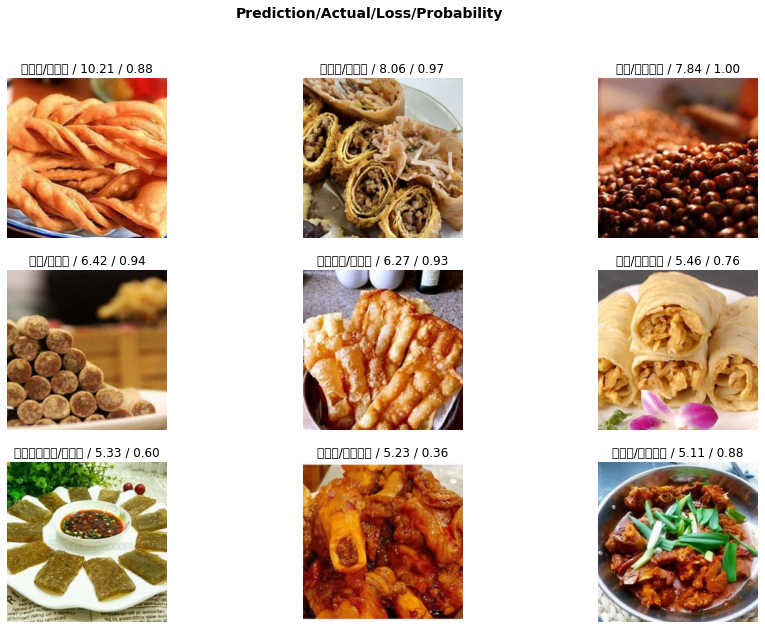

In [24]:
interp.plot_top_losses(9, figsize=(15,10))

In [25]:
test_dl = dls.test_dl(get_image_files(path/'test'),
                      with_labels=True)

/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22902 (\N{CJK UNIFIED IDEOGRAPH-5976}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30382 (\N{CJK UNIFIED IDEOGRAPH-76AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37221 (\N{CJK UNIFIED IDEOGRAPH-9165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


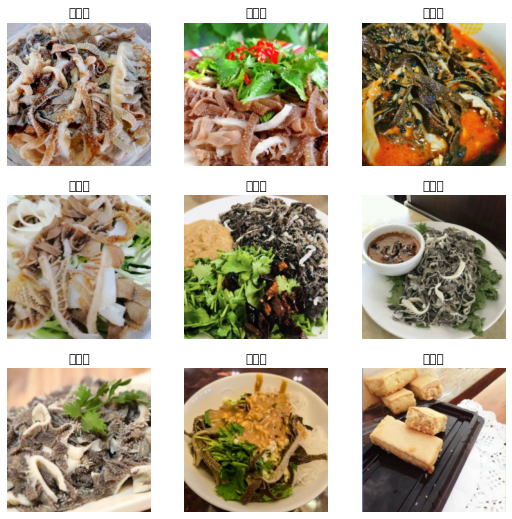

In [26]:
test_dl.show_batch()

In [27]:
preds, targets = learn.get_preds(dl=test_dl)

In [28]:
preds

tensor([[4.2675e-06, 4.4177e-06, 8.6218e-06,  ..., 2.1312e-04, 6.5800e-07,
         1.0259e-07],
        [1.0946e-07, 8.3739e-07, 1.4956e-07,  ..., 1.5784e-05, 1.2798e-06,
         9.6627e-09],
        [8.1932e-04, 1.2104e-05, 1.2273e-06,  ..., 5.5236e-07, 1.9151e-07,
         7.5260e-07],
        ...,
        [8.8645e-07, 5.1647e-06, 1.1075e-07,  ..., 1.5814e-08, 4.0735e-06,
         1.5158e-07],
        [2.3629e-06, 1.0985e-06, 2.9332e-06,  ..., 1.4383e-07, 9.5729e-06,
         3.6932e-07],
        [8.1865e-04, 1.2496e-03, 2.5725e-02,  ..., 2.1800e-01, 2.3694e-01,
         1.7085e-02]])

In [29]:
from fastai.tabular.all import *

In [30]:
accuracy(preds, targets)

TensorBase(0.8172)

In [31]:
interp = ClassificationInterpretation.from_learner(learn, 
                                                   dl=test_dl)

/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 20315 (\N{CJK UNIFIED IDEOGRAPH-4F5B}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 31957 (\N{CJK UNIFIED IDEOGRAPH-7CD5}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarning: Glyph 30524 (\N{CJK UNIFIED IDEOGRAPH-773C}) missing from current font.
  plt.tight_layout()
/environment/miniconda3/lib/python3.7/site-packages/fastai/interpret.py:149: UserWarn

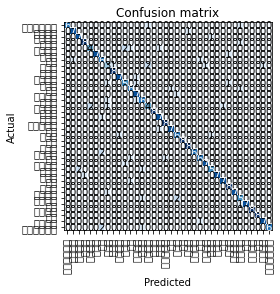

In [32]:
interp.plot_confusion_matrix()

In [33]:
learn.export("../export.pkl")